### Problem Statement

##### The car dataset contains information about various automobiles, including attributes such as price, engine size, horsepower, fuel efficiency, dimensions, and other technical specifications. However, like most real-world datasets, it contains missing values, inconsistent data formats, and variables that require transformation before meaningful analysis or modeling can be performed.

##### The objective of this project is to perform comprehensive data preprocessing to improve the dataset’s quality, consistency, and usability. This involves identifying and handling missing values, correcting data types, standardizing and normalizing numerical variables, and transforming data into suitable formats for analysis.

##### Specifically, the preprocessing tasks include identifying missing values and applying appropriate techniques to handle them, correcting incorrect data formats to ensure numerical and categorical variables are properly represented, standardizing units and formats for consistency, and normalizing numerical features through centering and scaling to ensure comparability. Additionally, binning will be applied to convert continuous variables into categorical groups for easier interpretation, and indicator variables will be created to represent categorical features in a numerical format suitable for analysis and machine learning models.

##### By performing these preprocessing steps, the dataset will be transformed into a clean, structured, and analysis-ready format, enabling accurate statistical analysis, visualization, and predictive modeling.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot

##### The dataset doesn't contain column headers, so we create an array to address that

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
#loading the dataset and viewing the first 5 rows
data=pd.read_csv("car_data.csv",names=headers)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Data Cleaning

##### The dataset also contains entries marked as "?" which is supposed to indicate NaN values.
#####  We will solve this using the replace function

In [4]:
data.replace("?",np.nan,inplace=True)

In [5]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### Above we can see that the values have been assigned NaN

##### Next we identify the number of empty entries in the columns. 

In [6]:
# Using this ".info()" method we can also get the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


##### This will be solved using the mean and mode of the columns
##### Also note that the datatypes of the columns will change

In [7]:
# filling the empty values of the "normalized" column
data["normalized-losses"]=data["normalized-losses"].fillna(data["normalized-losses"].astype(float).mean())

In [8]:
# filling the empty values of the "stroke" column
data["stroke"]=data["stroke"].fillna(data["stroke"].astype(float).mean())

In [9]:
# filling the empty values of the "bore" column
data["bore"]=data["bore"].fillna(data["bore"].astype(float).mean())

In [10]:
# filling the empty values of the "horsepower" column
data["horsepower"]=data["horsepower"].fillna(data["horsepower"].astype(float).mean())

In [11]:
# filling the empty values of the "peak-rpm" column
data["peak-rpm"]=data["peak-rpm"].fillna(data["peak-rpm"].astype(float).mean())

In [12]:
# The "num-of-doors" column has only 2 misisng values we will replace this with the mode
data["num-of-doors"]=data["num-of-doors"].fillna(f"{data["num-of-doors"].mode()}")

In [13]:
# The price column has 5 empty entries, we'll be dropping those rows
data.dropna(subset=["price"], inplace=True)
data.reset_index(drop=True, inplace=True)

In [14]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

##### From the above we can see that we have a dataset without any empty entries

#### Data Standardization

##### Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
##### In the data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit.
##### Let's Assume we're developing an application in a country that accepts the fuel consumption with L/100km standard.
##### We'll have to Transform mpg to L/100km:
##### We'll Use this formula for unit conversion:

##### L/100km = 235 / mpg

In [15]:
# conversion
data["city-mpg L/100km"]=235/data["city-mpg"]
data["highway-mpg L/100km"]=235/data["highway-mpg"]

#### Data Normalization
<p>Normalization is the process of transforming values of several variables into a similar range.</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>


In [16]:
#We'll be normalizing the length ,width and height column
data["length"]=data["length"]/max(data["length"])
data["height"]=data["height"]/max(data["height"])
data["width"]=data["width"]/max(data["width"])

#### Binning
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>
<p>
        In the data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. 
We can clasify this into cars with high horsepower, medium horsepower, and little horsepower.</p>

##### We'll Plot the histogram of horsepower to see the distribution of horsepower.

In [17]:
data["horsepower"]=data["horsepower"].astype(float)

Text(0.5, 1.0, 'horsepower bins')

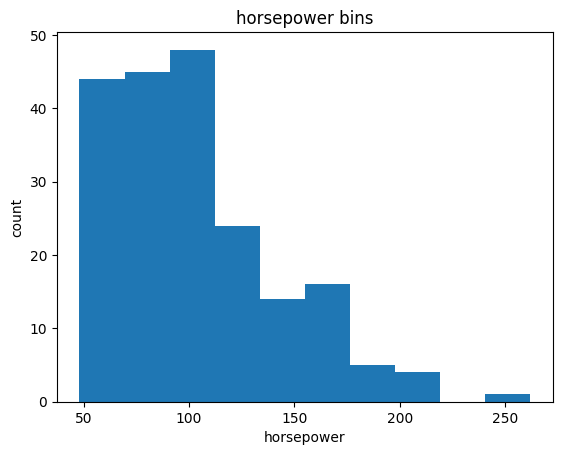

In [18]:
plt.pyplot.hist(data["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [19]:
data["horsepower-binned"]=pd.cut(data["horsepower"],bins=np.linspace(min(data["horsepower"]),max(data["horsepower"]),4),labels=["Low","medium","high"],include_lowest=True)
data[["horsepower", "horsepower-binned"]].head(5)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,medium
3,102.0,Low
4,115.0,Low


In [20]:
data["horsepower-binned"].value_counts()

horsepower-binned
Low       153
medium     43
high        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

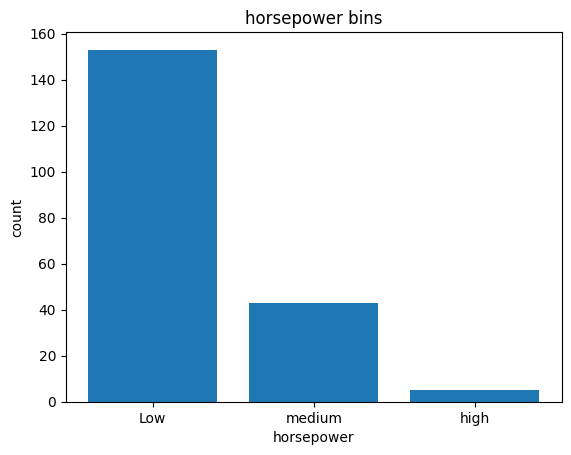

In [21]:
pyplot.bar(["Low","medium","high"], data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p> Looking at the graph above we have successfully narrowed down the intervals from 59 to 3
</p>


#### Indicator Variable


<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. 
</p>

<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". 
    Regression doesn't understand words, only numbers.
    To use this attribute in regression analysis, we will convert "fuel-type" to indicator variables.
</p>

In [22]:
dummy_variable_1 = pd.get_dummies(data["fuel-type"]).astype(int)
dummy_variable_1.rename(
    columns={
        'gas':'fuel-type-gas',
        'diesel':'fuel-type-diesel'
    },
    inplace=True)
dummy_variable_1.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [23]:
# Then join the orignal dataset and the new subset with the binary values
data=pd.concat([data,dummy_variable_1],axis=1)
# dropping the  original column "fuel-type" from "data"
data.drop("fuel-type", axis = 1, inplace=True)
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-mpg L/100km,highway-mpg L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000,21,27,13495,11.190476,8.703704,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000,21,27,16500,11.190476,8.703704,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000,19,26,16500,12.368421,9.038462,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500,24,30,13950,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500,18,22,17450,13.055556,10.681818,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,114.0,5400,23,28,16845,10.217391,8.392857,Low,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,160.0,5300,19,25,19045,12.368421,9.400000,medium,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,134.0,5500,18,23,21485,13.055556,10.217391,medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,106.0,4800,26,27,22470,9.038462,8.703704,Low,1,0


<p>
    The column "aspiration" has two unique values: "std" or "turbo". 
    Regression doesn't understand words, only numbers.
    To use this attribute in regression analysis, we will convert "aspiration" to indicator variables.
</p>

In [24]:
dummy_variable_2=pd.get_dummies(data["aspiration"]).astype(int)
dummy_variable_2.rename(
    columns={
        "std":"aspiration-std",
        "turbo":"aspiration-turbo"
    },
     inplace=True
)
dummy_variable_2.head(5)

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [25]:
# add the dummy_variable_2 subset to the dataset
data=pd.concat([data,dummy_variable_2],axis=1)
# dropping the aspiration column
data.drop("aspiration",axis=1,inplace=True)
data.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-mpg L/100km,highway-mpg L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495,11.190476,8.703704,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500,11.190476,8.703704,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500,12.368421,9.038462,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450,13.055556,10.681818,Low,0,1,1,0


In [26]:
# Now we save the clean dataset to a new file
data.to_csv("clean_car_data.csv")



## Author

<a href="https://www.linkedin.com/in/tanimowo-possible/" target="_blank">Tanimowo Possible</a>
